We perform this analysis for the grid in Ajau.  Ajau is near the north shore of Lake Sentani, has a full grid connection and about 100 households.

In [11]:
import pandas as pd
import os as os
import xlrd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# read in raw CSV file for preprocessing
energy_file = open("../data-timeseries/Data_Logs Ajau Agustus.csv")

# dump lines from communications messages or empty lines and write to string
file_string = ''
omit_strings = ['Power Up', 'Communication Lost', 'Power Down', ',,,,,,,,,,,']
# there is information in the first 32 lines being dumped
for line in energy_file.readlines()[32:]:
    if not any(omit in line for omit in omit_strings):
        file_string += line

# use pre-parsed string to read in data file to pandas and sort by date
import io
energy_data = pd.read_csv(io.StringIO(file_string),
                      index_col=0, 
                      parse_dates=[0], 
                      thousands=',')
energy_data = energy_data.sort_index()

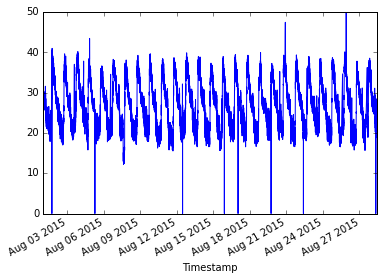

In [12]:
energy_data['Maximum real-time Total kVA'].plot()

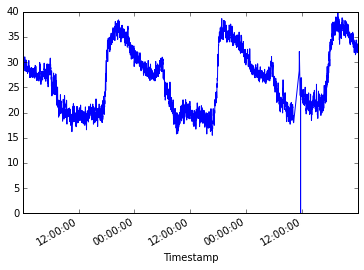

In [13]:
energy_data['2015-08-10':'2015-08-12']['Maximum real-time Total kVA'].plot()

# Load duration curve

Assuming the samples are evenly spaced, we can do a simple sort and construct a load duration curve.  There does seem to be a short period where much higher loads are demanded.  Zooming in, this looks like about 20 seconds of demand.  Maybe it is some sort of start up transient?

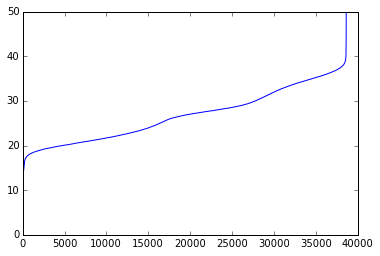

In [18]:
# sort and plot to create load-duration curve
load = energy_data['Maximum real-time Total kVA'].values
load.sort()
plt.plot(load)

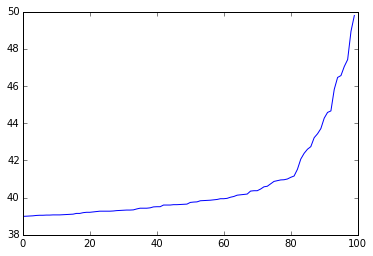

In [21]:
plt.plot(load[-100:])